In [12]:
import pandas as pd
from rxnmapper import RXNMapper
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import networkx as nx

In [24]:
rxn_mapper = RXNMapper()

da_rxn_smarts = AllChem.ReactionFromSmarts(
    '[#6:1]=[#6:2].[#6:3]=[#6:4][#6:5]=[#6:6]>>[#6:1]1[#6:2][#6:3][#6:4]=[#6:5][#6:6]1'
)

def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

def get_active_bonds(reactants, products):
    edges1 = reactants.edges()
    edges2 = products.edges()
    active_edges = list(set(edges1) - set(edges2))
    print([()])

def test(reaction_smiles):
    reaction_smiles = rxn_mapper.get_attention_guided_atom_maps([reaction_smiles])[0]['mapped_rxn']
    reactants, products = reaction_smiles.split('>>')
    reactants, products = Chem.MolFromSmarts(reactants), Chem.MolFromSmarts(products)
    reactants_graph, products_graph = mol_to_nx(reactants), mol_to_nx(products)
    print(reactants, products)
    get_active_bonds(reactants_graph, products_graph)
    
    return reaction_smiles
#     rxn = Chem.rdChemReactions.ReactionFromSmarts(reaction_smiles, useSmiles=False)
#     rxn.Initialize()
    
#     product_mol = Chem.MolFromSmiles(reaction_smiles.split('>>')[1])
    
#     reacting_atoms = rxn.GetReactingAtoms()
#     if len(reacting_atoms[0]) == 2 and len(reacting_atoms[1]) == 4:
#         reactants = reaction_smiles.split('>>')[0].split('.')
#         dienophile_smiles, dienophile_idxs = reactants[0], reacting_atoms[0]
#         diene_smiles, diene_idxs = reactants[1], reacting_atoms[1]
#     elif len(reacting_atoms[0]) ==4 and len(reacting_atoms[1]) == 2:
#         reactants = reaction_smiles.split('>>')[0].split('.')
#         dienophile_smiles, dienophile_idxs = reactants[1], reacting_atoms[1]
#         diene_smiles, diene_idxs = reactants[0], reacting_atoms[0]
#     else:
#         print("couldnt extract diene + dienophile", reacting_atoms)
#         return []

Some weights of the model checkpoint at /home/ruard/anaconda3/envs/ts/lib/python3.8/site-packages/rxnmapper/models/transformers/albert_heads_8_uspto_all_1310k were not used when initializing AlbertModel: ['predictions.decoder.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.LayerNorm.bias', 'predictions.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
rxn = 'C=CC(=O)OCC.C=CC(=C)C>>CCOC(=O)C1CCC=C(C)C1'
smiles = test(rxn)
smiles

<rdkit.Chem.rdchem.Mol object at 0x7fb0f594cdd0> <rdkit.Chem.rdchem.Mol object at 0x7fb0f594c270>
[(2, 4), (10, 11), (8, 10)]


'[CH2:8]=[CH:9][C:10](=[CH2:11])[CH3:12].[CH3:1][CH2:2][O:3][C:4](=[O:5])[CH:6]=[CH2:7]>>[CH3:1][CH2:2][O:3][C:4](=[O:5])[CH:6]1[CH2:7][CH2:8][CH:9]=[C:10]([CH3:11])[CH2:12]1'

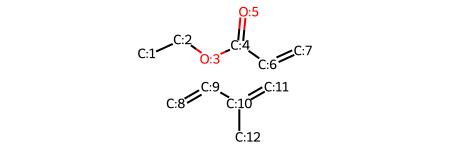

In [26]:
Chem.MolFromSmiles(smiles.split('>>')[0])

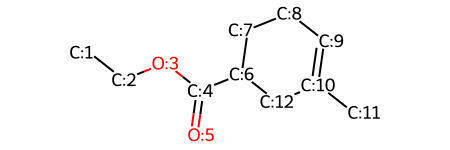

In [27]:
Chem.MolFromSmiles(smiles.split('>>')[1])